In [35]:
# Import the dependencies.
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine, text

In [36]:
# Create a reference to the file. 
database_path = Path("nba_db.db")

In [37]:
# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [38]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM Basketball", conn)
data.head()

,id,rk,player,pos,age,tm,g,gs,mp,fg,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
0,0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [39]:
nba_data_df = data.drop(columns=["id","rk"])
nba_data_df.head()

,player,pos,age,tm,g,gs,mp,fg,fga,fg%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [40]:
nba_data_df = nba_data_df.rename(columns={
    "pos": "position",
    "tm": "team",
    "g": "games played",
    "gs": "games scored",
    "mp": "avg minutes played",
    "fg": "avg field goals made",
    "fga": "avg field goals attempted",
    "fg%": "field goal made %",
    "3p": "avg three-point shots made",
    "3pa": "avg three-point shots attempted",
    "3p%": "three-point shots made %",
    "2p": "avg two-point shots made",
    "2pa": "avg two-point shots attempted",
    "2p%": "two-point shots made %",   
    "efg%": "effective goal %",
    "ft": "avg free-throw shots made",
    "fta": "avg free-throw shots attempted",
    "ft%": "free-throw shots made %",
    "orb": "avg offensive rebounds",
    "drb": "avg defensive rebounds",
    "trb": "avg total rebounds",
    "ast": "avg assists",
    "stl": "avg steals",
    "blk": "avg blocks",
    "tov": "avg turnovers",
    "pf": "avg personal fouls",
    "pts": "avg points scored"
})
nba_data_df.head()

,player,position,age,team,games played,games scored,avg minutes played,avg field goals made,avg field goals attempted,field goal made %,...,avg offensive rebounds,avg defensive rebounds,avg total rebounds,avg assists,avg steals,avg blocks,avg turnovers,avg personal fouls,avg points scored,year
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [41]:
nba_data_df["total minutes played"] = nba_data_df["avg minutes played"] * nba_data_df["games played"]
nba_data_df["total field goals made"] = nba_data_df["avg field goals made"] * nba_data_df["games played"]
nba_data_df["total field goals attempted"] = nba_data_df["avg field goals attempted"] * nba_data_df["games played"]
nba_data_df["total three-point shots made"] = nba_data_df["avg three-point shots made"] * nba_data_df["games played"]
nba_data_df["total three-point shots attempted"] = nba_data_df["avg three-point shots attempted"] * nba_data_df["games played"]
nba_data_df["total two-point shots made"] = nba_data_df["avg two-point shots made"] * nba_data_df["games played"]
nba_data_df["total two-point shots attempted"] = nba_data_df["avg two-point shots attempted"] * nba_data_df["games played"]
nba_data_df["total free-throw shots made"] = nba_data_df["avg free-throw shots made"] * nba_data_df["games played"]
nba_data_df["total free-throw shots attempted"] = nba_data_df["avg free-throw shots attempted"] * nba_data_df["games played"]
nba_data_df["total offensive rebounds"] = nba_data_df["avg offensive rebounds"] * nba_data_df["games played"]
nba_data_df["total defensive rebounds"] = nba_data_df["avg defensive rebounds"] * nba_data_df["games played"]
nba_data_df["total rebounds"] = nba_data_df["avg total rebounds"] * nba_data_df["games played"]
nba_data_df["total assists"] = nba_data_df["avg assists"] * nba_data_df["games played"]
nba_data_df["total steals"] = nba_data_df["avg steals"] * nba_data_df["games played"]
nba_data_df["total blocks"] = nba_data_df["avg blocks"] * nba_data_df["games played"]
nba_data_df["total turnovers"] = nba_data_df["avg turnovers"] * nba_data_df["games played"]
nba_data_df["total personal fouls"] = nba_data_df["avg personal fouls"] * nba_data_df["games played"]
nba_data_df["total points scored"] = nba_data_df["avg points scored"] * nba_data_df["games played"]
nba_data_df

,player,position,age,team,games played,games scored,avg minutes played,avg field goals made,avg field goals attempted,field goal made %,...,total free-throw shots attempted,total offensive rebounds,total defensive rebounds,total rebounds,total assists,total steals,total blocks,total turnovers,total personal fouls,total points scored
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,15.5,6.2,31.0,37.2,58.9,15.5,0.0,18.6,31.0,226.3
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,123.9,41.3,70.8,118.0,53.1,35.4,11.8,64.9,82.6,377.6
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,639.6,229.6,352.6,582.2,213.2,90.2,73.8,254.2,205.0,1828.6
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,102.0,18.0,132.0,144.0,210.0,72.0,12.0,114.0,96.0,486.0
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,37.0,7.4,40.7,48.1,70.3,25.9,3.7,48.1,51.8,166.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14568,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,26.0,39.0,75.4,114.4,44.2,31.2,10.4,20.8,44.2,163.8
14569,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.46,...,554.8,53.2,235.6,281.2,737.2,68.4,7.6,304.0,129.2,2158.4
14570,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,61.6,84.0,207.2,296.8,50.4,16.8,22.4,39.2,84.0,296.8
14571,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,...,48.6,51.3,75.6,124.2,21.6,8.1,5.4,18.9,56.7,140.4


## Question 1:
### Does age affect performance, as measured by FG%, PPG, minutes played, etc.?

## Question 2:
### Does position impact performance stats as measured by playing time, PPG, etc.?

## Question 3:
### How have average stats per position changed over time?

In [42]:
nba_data_df['field goal made %'] = nba_data_df['field goal made %'].replace('NULL', 0)
nba_data_df['three-point shots made %'] = nba_data_df['three-point shots made %'].replace('NULL', 0)
nba_data_df['two-point shots made %'] = nba_data_df['two-point shots made %'].replace('NULL', 0)
nba_data_df['free-throw shots made %'] = nba_data_df['free-throw shots made %'].replace('NULL', 0)

In [43]:
nba_data_df[['season start','season end']] = nba_data_df.year.str.split("-",expand=True)
nba_data_df

,player,position,age,team,games played,games scored,avg minutes played,avg field goals made,avg field goals attempted,field goal made %,...,total defensive rebounds,total rebounds,total assists,total steals,total blocks,total turnovers,total personal fouls,total points scored,season start,season end
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,31.0,37.2,58.9,15.5,0.0,18.6,31.0,226.3,1997,1998
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,70.8,118.0,53.1,35.4,11.8,64.9,82.6,377.6,1997,1998
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,352.6,582.2,213.2,90.2,73.8,254.2,205.0,1828.6,1997,1998
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,132.0,144.0,210.0,72.0,12.0,114.0,96.0,486.0,1997,1998
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,40.7,48.1,70.3,25.9,3.7,48.1,51.8,166.5,1997,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14568,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,75.4,114.4,44.2,31.2,10.4,20.8,44.2,163.8,2021,2022
14569,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,235.6,281.2,737.2,68.4,7.6,304.0,129.2,2158.4,2021,2022
14570,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,207.2,296.8,50.4,16.8,22.4,39.2,84.0,296.8,2021,2022
14571,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,...,75.6,124.2,21.6,8.1,5.4,18.9,56.7,140.4,2021,2022


In [80]:
minutes_yearly = nba_data_df.groupby("season start")["total minutes played"].mean().reset_index()
display(minutes_yearly)

,season start,total minutes played
0,1997,1159.596840
1,1998,731.619478
2,1999,1207.491376
3,2000,1165.320265
4,2001,1220.897963
5,2002,1263.422996
6,2003,1119.271875
7,2004,1137.306597
8,2005,1155.512455
9,2006,1222.414004


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

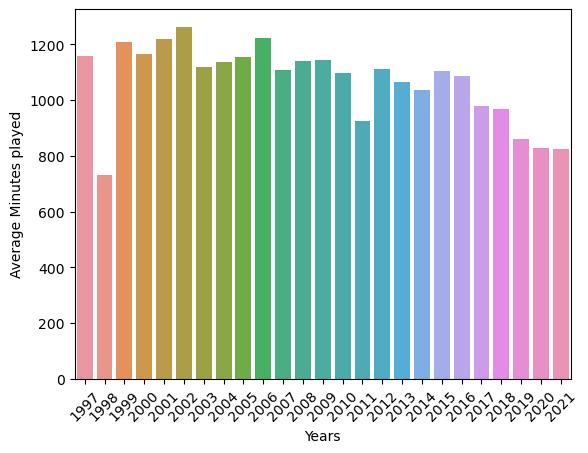

In [81]:
my=sns.barplot(data=minutes_yearly, x='season start', y='total minutes played', 
             )

my.set_ylabel("Average Minutes played")
my.set_xlabel("Years")
my.set_xticklabels(my.get_xticklabels(), rotation=45)

In [77]:
points_scored = nba_data_df.groupby("season start")["total points scored"].mean().reset_index()
display(points_scored)

,season start,total points scored
0,1997,454.753346
1,1998,277.300201
2,1999,487.774333
3,2000,452.873864
4,2001,483.001426
5,2002,497.283544
6,2003,430.461979
7,2004,455.908681
8,2005,461.647473
9,2006,496.545562


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

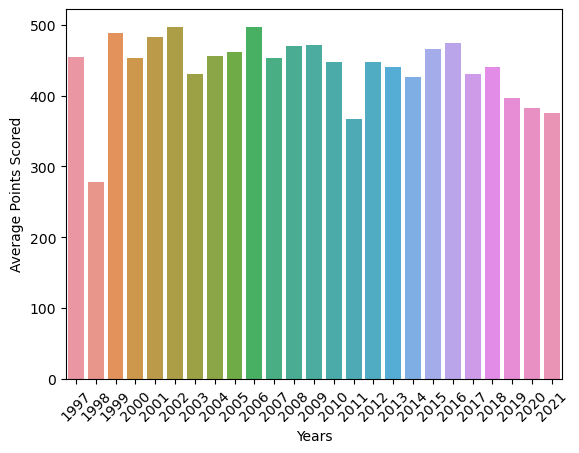

In [76]:
ps=sns.barplot(data=points_scored, x='season start', y='total points scored', 
             )

ps.set_ylabel("Average Points Scored")
ps.set_xlabel("Years")
ps.set_xticklabels(ps.get_xticklabels(), rotation=45)

In [59]:
totalturnovers= nba_data_df.groupby("season start")["total turnovers"].mean().reset_index()
display(totalturnovers)

,season start,total turnovers
0,1997,71.492751
1,1998,44.218072
2,1999,74.600000
3,2000,69.556061
4,2001,69.591242
5,2002,74.764135
6,2003,65.993750
7,2004,65.149826
8,2005,65.992419
9,2006,73.626233


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

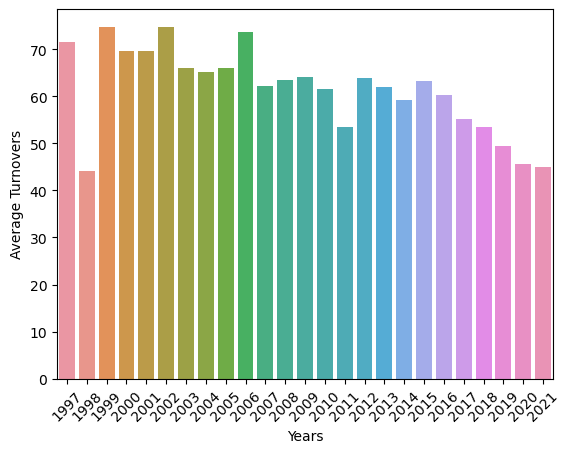

In [66]:
tt=sns.barplot(data=totalturnovers, x='season start', y='total turnovers', 
             )

tt.set_ylabel("Average Turnovers")
tt.set_xlabel("Years")
tt.set_xticklabels(tt.get_xticklabels(), rotation=45)

In [67]:
offensiverebounds= nba_data_df.groupby("season start")["total offensive rebounds"].mean().reset_index()
display(offensiverebounds)

,season start,total offensive rebounds
0,1997,61.771190
1,1998,38.081325
2,1999,62.225257
3,2000,58.546212
4,2001,61.636049
5,2002,62.577215
6,2003,55.919271
7,2004,55.974479
8,2005,53.171841
9,2006,55.679487


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

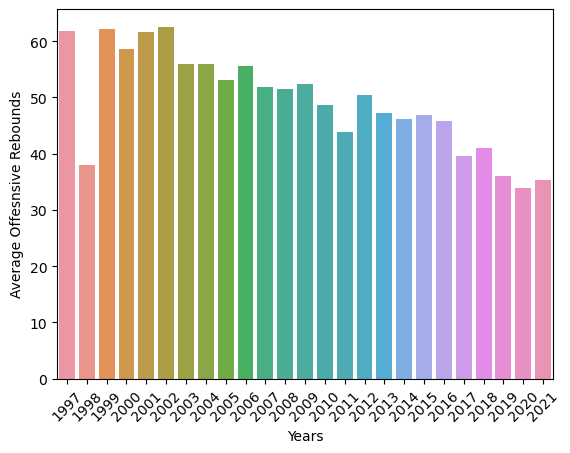

In [72]:
off=sns.barplot(data=offensiverebounds, x='season start', y='total offensive rebounds', 
             )

off.set_ylabel("Average Offesnsive Rebounds")
off.set_xlabel("Years")
off.set_xticklabels(tt.get_xticklabels(), rotation=45)

In [69]:
defensiverebounds = nba_data_df.groupby("season start")["total defensive rebounds"].mean().reset_index()
display(defensiverebounds)

,season start,total defensive rebounds
0,1997,134.889033
1,1998,87.481325
2,1999,152.173306
3,2000,147.791477
4,2001,152.021996
5,2002,157.480802
6,2003,139.837847
7,2004,139.990799
8,2005,141.562996
9,2006,150.048718


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

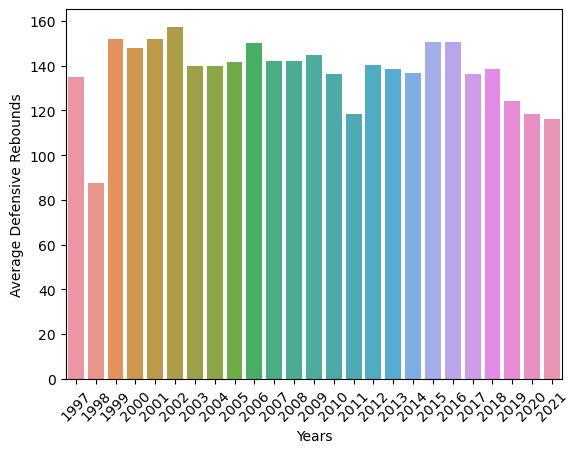

In [84]:
dfr=sns.barplot(data=defensiverebounds, x='season start', y='total defensive rebounds', 
             )

dfr.set_ylabel("Average Defensive Rebounds")
dfr.set_xlabel("Years")
dfr.set_xticklabels(dfr.get_xticklabels(), rotation=45)

In [121]:
nba_data_df["field goal rate"] = (nba_data_df["total field goals made"]  / nba_data_df["total field goals attempted"]) * 100


In [123]:
averagefieldgoals = nba_data_df.groupby("season start")["field goal rate"].mean().reset_index()
display(averagefieldgoals)

,season start,field goal rate
0,1997,42.998399
1,1998,41.222519
2,1999,42.741369
3,2000,42.202117
4,2001,42.540279
5,2002,41.295376
6,2003,41.592747
7,2004,42.916076
8,2005,43.478197
9,2006,43.239713


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

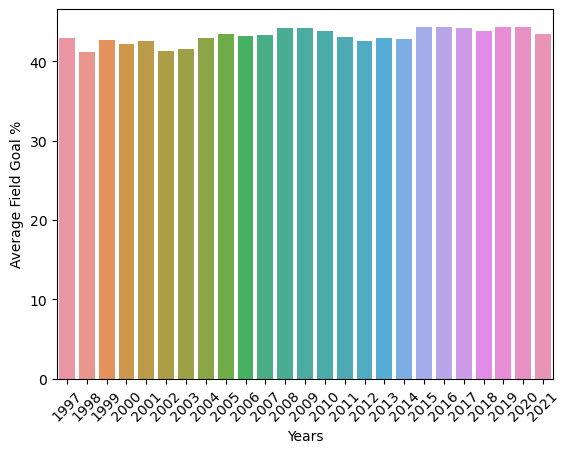

In [124]:
fg=sns.barplot(data=averagefieldgoals, x='season start', y='field goal rate', 
             )

fg.set_ylabel("Average Field Goal %")
fg.set_xlabel("Years")
fg.set_xticklabels(fg.get_xticklabels(), rotation=45)

In [127]:
nba_data_df["free throw rate"] = (nba_data_df["total free-throw shots made"]  / nba_data_df["total free-throw shots attempted"]) * 100

In [128]:
freethrow = nba_data_df.groupby("season start")["free throw rate"].mean().reset_index()
freethrow

,season start,free throw rate
0,1997,71.271636
1,1998,70.878186
2,1999,72.709637
3,2000,71.677244
4,2001,71.969641
5,2002,73.331495
6,2003,72.873534
7,2004,72.612105
8,2005,71.149715
9,2006,72.578205


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

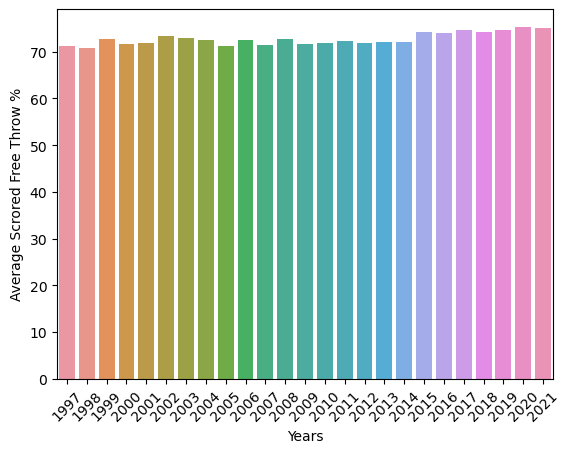

In [129]:
ft=sns.barplot(data=freethrow, x='season start', y='free throw rate', 
             )

ft.set_ylabel("Average Scrored Free Throw %")
ft.set_xlabel("Years")
ft.set_xticklabels(ft.get_xticklabels(), rotation=45)

In [130]:
fouls = nba_data_df.groupby("season start")["total personal fouls"].mean().reset_index()
display(fouls)

,season start,total personal fouls
0,1997,107.667658
1,1998,67.697390
2,1999,116.786448
3,2000,108.545265
4,2001,107.475153
5,2002,113.372152
6,2003,99.636632
7,2004,107.223437
8,2005,108.970397
9,2006,111.329783


[Text(0, 0, '1997'),
 Text(1, 0, '1998'),
 Text(2, 0, '1999'),
 Text(3, 0, '2000'),
 Text(4, 0, '2001'),
 Text(5, 0, '2002'),
 Text(6, 0, '2003'),
 Text(7, 0, '2004'),
 Text(8, 0, '2005'),
 Text(9, 0, '2006'),
 Text(10, 0, '2007'),
 Text(11, 0, '2008'),
 Text(12, 0, '2009'),
 Text(13, 0, '2010'),
 Text(14, 0, '2011'),
 Text(15, 0, '2012'),
 Text(16, 0, '2013'),
 Text(17, 0, '2014'),
 Text(18, 0, '2015'),
 Text(19, 0, '2016'),
 Text(20, 0, '2017'),
 Text(21, 0, '2018'),
 Text(22, 0, '2019'),
 Text(23, 0, '2020'),
 Text(24, 0, '2021')]

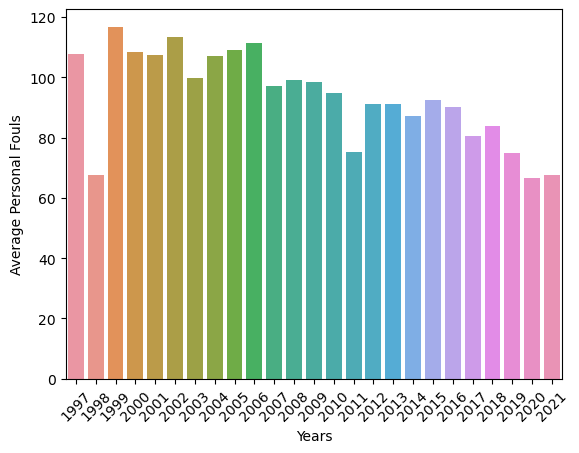

In [131]:
fs=sns.barplot(data=fouls, x='season start', y='total personal fouls', 
             )

fs.set_ylabel("Average Personal Fouls")
fs.set_xlabel("Years")
fs.set_xticklabels(fs.get_xticklabels(), rotation=45)

## Question 4:
### For players that played for more than one team in a single season, did they tend to score better for a certain team (their first, third, etc.)?